<a href="https://colab.research.google.com/github/VitaliyKiwi/Pneumo/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Pneumonia_Detection_using_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/pneumonia-detection-using-deep-learning-and-swagger-18aa5e8af576

## **Pneumonia Detection using deep learning and swagger.**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#importing library
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip /content/chest-xray-pneumonia.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open /content/chest-xray-pneumonia.zip, /content/chest-xray-pneumonia.zip.zip or /content/chest-xray-pneumonia.zip.ZIP.


In [ ]:
train_path = '/content/chest_xray/train'
valid_path = '/content/chest_xray/val'

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# useful for getting number of classes
folders = glob('/content/chest_xray/chest_xray/train/*')

In [ ]:
folders

[]

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)#this removes the last layers
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)#shapes all values between 0 and 1

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/AI_Project/chest/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4124 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/AI_Project/chest/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1230 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

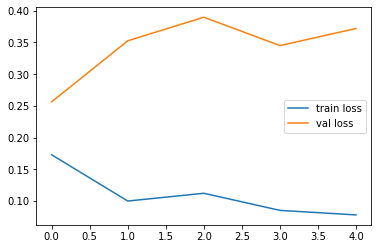

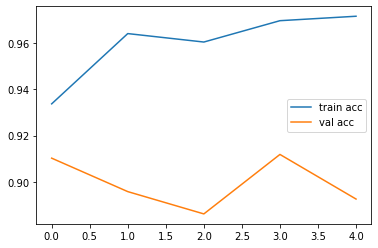

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.predict()

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/My Drive/ipynb/model_vgg19.h5')

In [ ]:
### Create a Pickle file using backup
import pickle
pickle_out = open("/content/drive/My Drive/ipynb/classifier.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [ ]:
pip install tensorflowjs

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 92kB 4.4MB/s 
     |████████████████████████████████| 137.3MB 76kB/s 
     |████████████████████████████████| 256kB 42.6MB/s 
     |████████████████████████████████| 921kB 39.5MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=35541e2855e697878e90da030e2bb08776223920f01591afa42e4727577bdc47
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: ipython 7.16.1 has requirement prompt-toolkit!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.14 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.8.0
    Uninst

In [ ]:
tenorflowjs_converter --input_format = keras /content/model_vgg19.h5 model_js

In [ ]:
from flask import Flask
app = Flask(__name__)

@app.route("/")
def hello():
    return "<h1>Not Much Going On Here</h1>"
app.run(host='0.0.0.0', port=50000)


In [ ]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'

*-------------------------------------------------------------------------* 


In [ ]:
pip install tensorflow

In [ ]:
from flask import Flask
import flasgger
from flasgger import Swagger
import tensorflow as tf
from tensorflow.python.keras.backend import set_session
from tensorflow.python.keras.models import load_model

sess = tf.compat.v1.Session()
global graph
graph = tf.compat.v1.get_default_graph()
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
set_session(sess)
MODEL_PATH="model_vgg19.h5"
model = load_model(MODEL_PATH)
#model._make_predict_function()

In [ ]:
from flask import Flask, request
import numpy as np
import pickle
import pandas as pd
import flasgger
from flasgger import Swagger

app=Flask(__name__)
Swagger(app)

# pickle_in = open("classifier.pkl","rb")
# classifier=pickle.load(pickle_in)

@app.route('/')
def welcome():
    return "Welcome All"

@app.route('/predict_file',methods=["POST"])
def predict_note_file():
    """Let's Predict Pneumonia
    This is using docstrings for specifications.
    ---
    parameters:
      - name: file
        in: formData
        type: file
        required: true
      
    responses:
        200:
            description: The output values
        
    """
    img = image.load_img(request.files.get("file"),target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    img_data = preprocess_input(x)
    global sess
    global graph
    with graph.as_default():
        set_session(sess)
        classes = model.predict(img_data)
    A = np.squeeze(np.asarray(classes))
    if(A[1]==1):
        return "PNEUMONIA"
    else:
        return "NORMAL"
    
if __name__=='__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
